# Rainfall Prediction - Machine Learning Model

This notebook contains the complete ML pipeline for predicting rainfall.

## Project Objectives
- Understand the problem (Classification)
- Data preprocessing and cleaning
- Data visualization and insights
- Model building with multiple algorithms
- Model evaluation and accuracy
- Save the model for deployment

## Step 1: Import Necessary Libraries

In [25]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and model selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Serialization
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Import and Load the Dataset

In [26]:
# Load the dataset
base_dir = Path.cwd().resolve()
data_path = base_dir.parent / 'Weather.csv - Dataset.csv'
data = pd.read_csv(data_path)

print("Dataset path:", data_path)
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

Dataset path: /Users/akondiathreya/Documents/Development/Projects/APSCHE/Weather.csv - Dataset.csv
Dataset shape: (145460, 24)

First few rows:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0

## Step 3: Analyze the Dataset

In [27]:
# Dataset summary
print("Dataset Info:")
print(data.info())

print("\nStatistical Description:")
print(data.describe())

print("\nDataset Shape:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  str    
 1   Location       145460 non-null  str    
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  str    
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  str    
 10  WindDir3pm     141232 non-null  str    
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-n

## Step 4: Check for Missing Values

In [28]:
# Check for missing values
print("Missing Values:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

# Calculate percentage of missing values
print("\nPercentage of Missing Values:")
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Missing Values:
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
dtype: int64

Percentage of Missing Values:
@dropdown        100.000000
Sunshine          48.009762
Evaporation       43.166506
Cloud3pm          40.807095
Cloud9am          38.421559
Pressure9am       10.356799
Pressure3pm       10.331363
WindDir9am         7.263853
WindGustDir        7.098859
WindGustSpeed      7.055548
Humidity3pm        3.098446
WindDir3pm         2.906641
Temp3pm            2.481094
Rainfall           2.241853
RainToday          2

## Step 5: Visualize Missing Data

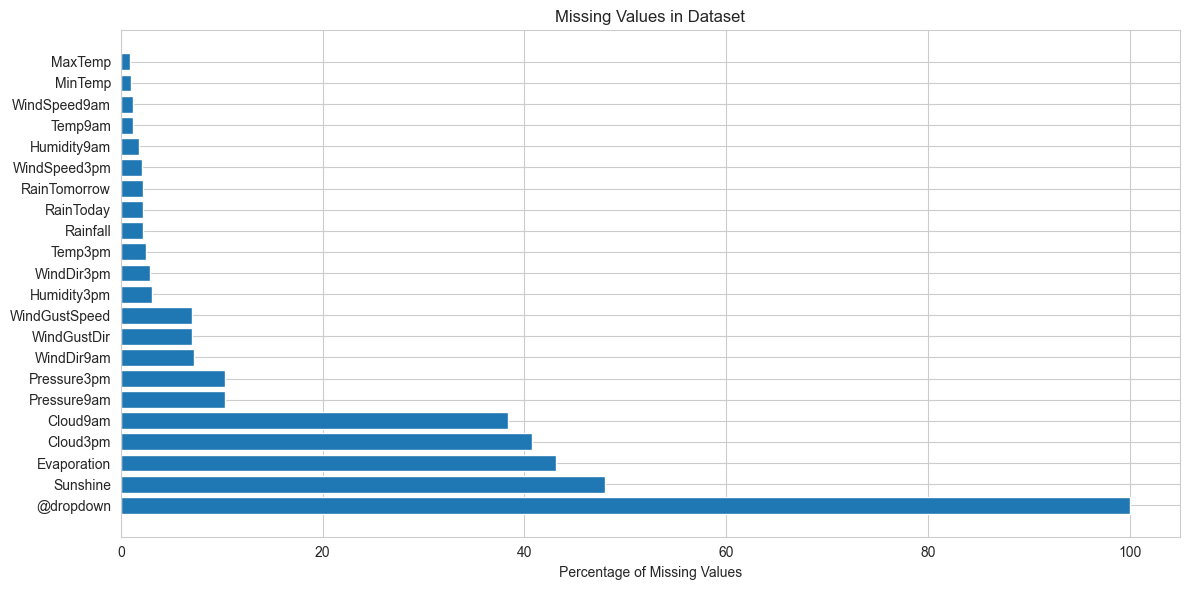

Missing values visualization complete!


In [29]:
# Create a visualization of missing values
plt.figure(figsize=(12, 6))
missing_percent_sorted = missing_percent[missing_percent > 0].sort_values(ascending=False)
plt.barh(missing_percent_sorted.index, missing_percent_sorted.values)
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values in Dataset')
plt.tight_layout()
plt.show()

print("Missing values visualization complete!")

## Step 6: Data Cleaning and Preprocessing

In [30]:
# Create a copy of the dataset
data_clean = data.copy()

# Drop columns with excessive missing values
data_clean = data_clean.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# Drop rows where RainTomorrow is missing (target variable)
data_clean = data_clean.dropna(subset=['RainTomorrow'])

# Handle NA values in RainToday
data_clean['RainToday'].fillna('No', inplace=True)

print("Shape after initial cleaning:", data_clean.shape)
print("\nRemaining missing values:")
print(data_clean.isnull().sum()[data_clean.isnull().sum() > 0])

Shape after initial cleaning: (142207, 20)

Remaining missing values:
MinTemp             640
MaxTemp             329
Rainfall           1409
WindGustDir        9344
WindGustSpeed      9284
WindDir9am        10017
WindDir3pm         3780
WindSpeed9am       1351
WindSpeed3pm       2632
Humidity9am        1777
Humidity3pm        3612
Pressure9am       14017
Pressure3pm       13983
Temp9am             907
Temp3pm            2728
RainToday          1409
@dropdown        142207
dtype: int64


## Step 7: Impute Missing Values

In [32]:
# Impute missing values
# First, identify numeric and categorical columns
numeric_columns = data_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Fill numeric columns with mean
for col in numeric_columns:
    if data_clean[col].isnull().sum() > 0:
        data_clean[col].fillna(data_clean[col].mean(), inplace=True)

# Fill categorical columns with mode (most frequent value)
for col in categorical_cols:
    if col in data_clean.columns and data_clean[col].isnull().sum() > 0:
        mode_val = data_clean[col].mode()[0] if not data_clean[col].mode().empty else 'N'
        data_clean[col].fillna(mode_val, inplace=True)

# Drop @dropdown column if it exists (it's a form-only field, not part of the dataset)
if '@dropdown' in data_clean.columns:
    data_clean = data_clean.drop('@dropdown', axis=1)

# Verify no missing values remain
remaining_nulls = data_clean.isnull().sum().sum()
if remaining_nulls > 0:
    print(f"WARNING: {remaining_nulls} NaN values still remaining!")
    print("Columns with NaN:")
    print(data_clean.isnull().sum()[data_clean.isnull().sum() > 0])
    # Final fallback: drop any remaining rows with NaN
    data_clean = data_clean.dropna()
    print(f"Dropped rows with NaN. New shape: {data_clean.shape}")
else:
    print("✓ All missing values successfully imputed!")

# Store imputers for later use (for Flask app)
imputer = SimpleImputer(strategy='mean')
imputer.fit(data_clean[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer.fit(data_clean[[col for col in categorical_cols if col in data_clean.columns]])

print("\nDataset shape after imputation:", data_clean.shape)
print("Total missing values:", data_clean.isnull().sum().sum())

✓ All missing values successfully imputed!

Dataset shape after imputation: (112925, 19)
Total missing values: 0


## Step 8: Encode Categorical Variables

In [33]:
# Drop Location and Date columns as they are not needed for prediction
cols_to_drop = [col for col in ['Location', 'Date', '@dropdown'] if col in data_clean.columns]
if cols_to_drop:
    data_clean = data_clean.drop(cols_to_drop, axis=1)

# Get categorical columns
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Create label encoders dictionary
label_encoders = {}

# Encode categorical features
for col in categorical_features:
    if col in data_clean.columns:
        le = LabelEncoder()
        data_clean[col] = le.fit_transform(data_clean[col].astype(str))
        label_encoders[col] = le

print("✓ Categorical encoding complete!")
print("\nDataset after encoding:")
print(data_clean.head())
print("\nDataset shape:", data_clean.shape)
print("\nData types:")
print(data_clean.dtypes)
print("\nMissing values:")
print(data_clean.isnull().sum().sum())

✓ Categorical encoding complete!

Dataset after encoding:
   MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0     13.4     22.9       0.6           13           44.0          13   
1      7.4     25.1       0.0           14           44.0           6   
2     12.9     25.7       0.0           15           46.0          13   
3      9.2     28.0       0.0            4           24.0           9   
4     17.5     32.3       1.0           13           41.0           1   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          14          20.0          24.0         71.0         22.0   
1          15           4.0          22.0         44.0         25.0   
2          15          19.0          26.0         38.0         30.0   
3           0          11.0           9.0         45.0         16.0   
4           7           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0  

## Step 9: Data Visualization and Exploration

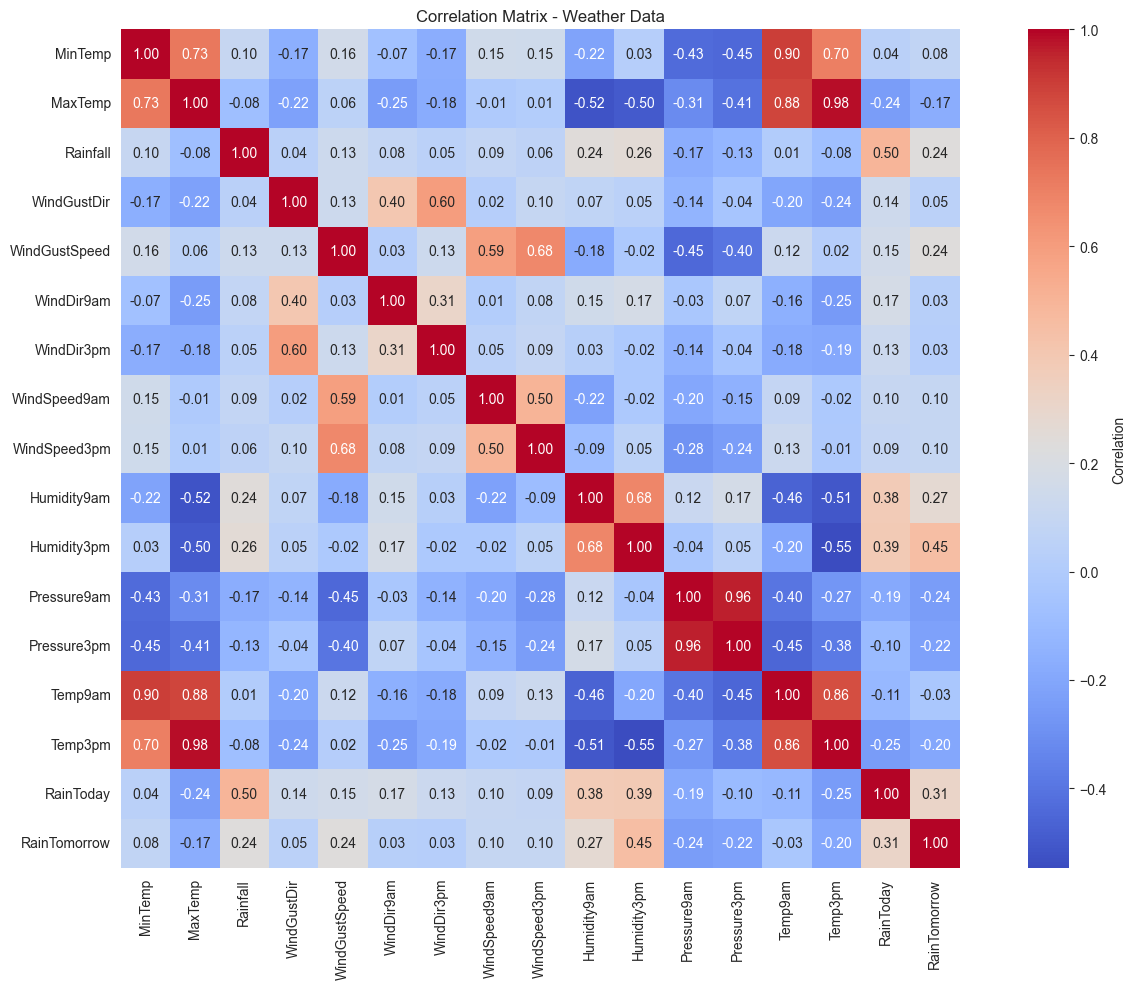

Correlation with RainTomorrow:
RainTomorrow     1.000000
Humidity3pm      0.453531
RainToday        0.313139
Humidity9am      0.274443
WindGustSpeed    0.238248
Rainfall         0.236888
WindSpeed3pm     0.098108
WindSpeed9am     0.095273
MinTemp          0.079938
WindGustDir      0.051066
WindDir9am       0.030778
WindDir3pm       0.026762
Temp9am         -0.033387
MaxTemp         -0.166902
Temp3pm         -0.201461
Pressure3pm     -0.221216
Pressure9am     -0.241062
Name: RainTomorrow, dtype: float64


In [34]:
# Calculate correlation matrix
correlation_matrix = data_clean.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            cbar_kws={'label': 'Correlation'}, square=True)
plt.title('Correlation Matrix - Weather Data')
plt.tight_layout()
plt.show()

print("Correlation with RainTomorrow:")
print(correlation_matrix['RainTomorrow'].sort_values(ascending=False))

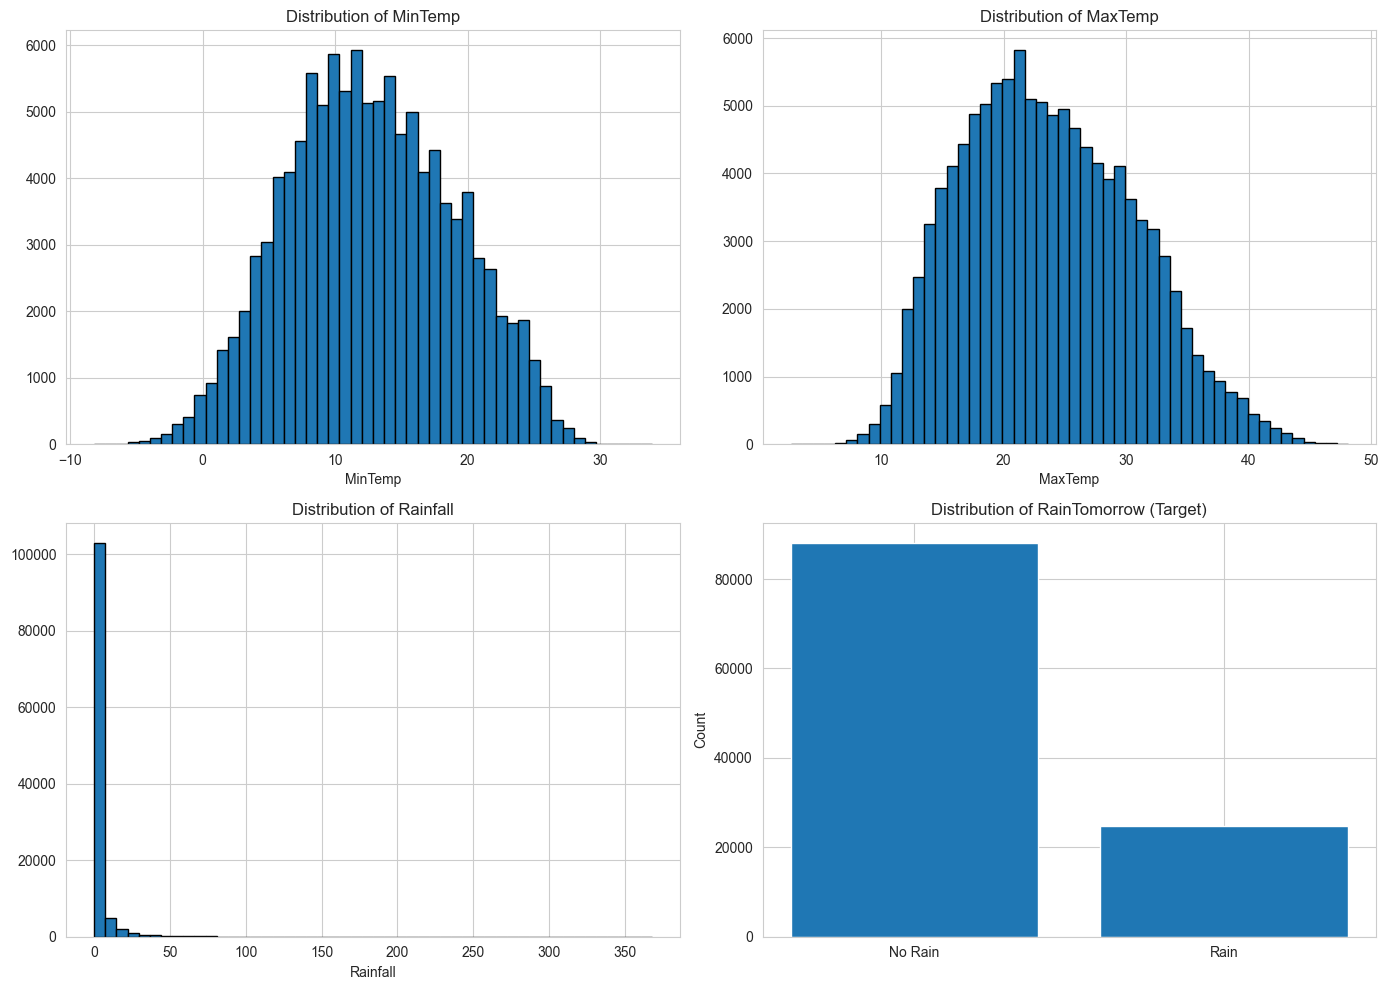


Target Variable Distribution:
RainTomorrow
0    88138
1    24787
Name: count, dtype: int64

Percentage - No Rain: 78.05%
Percentage - Rain: 21.95%


In [35]:
# Distribution of key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MinTemp distribution
axes[0, 0].hist(data_clean['MinTemp'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of MinTemp')
axes[0, 0].set_xlabel('MinTemp')

# MaxTemp distribution
axes[0, 1].hist(data_clean['MaxTemp'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of MaxTemp')
axes[0, 1].set_xlabel('MaxTemp')

# Rainfall distribution
axes[1, 0].hist(data_clean['Rainfall'], bins=50, edgecolor='black')
axes[1, 0].set_title('Distribution of Rainfall')
axes[1, 0].set_xlabel('Rainfall')

# RainTomorrow distribution
rain_counts = data_clean['RainTomorrow'].value_counts()
axes[1, 1].bar(['No Rain', 'Rain'], rain_counts.values)
axes[1, 1].set_title('Distribution of RainTomorrow (Target)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\nTarget Variable Distribution:")
print(data_clean['RainTomorrow'].value_counts())
print(f"\nPercentage - No Rain: {(rain_counts[0]/len(data_clean))*100:.2f}%")
print(f"Percentage - Rain: {(rain_counts[1]/len(data_clean))*100:.2f}%")

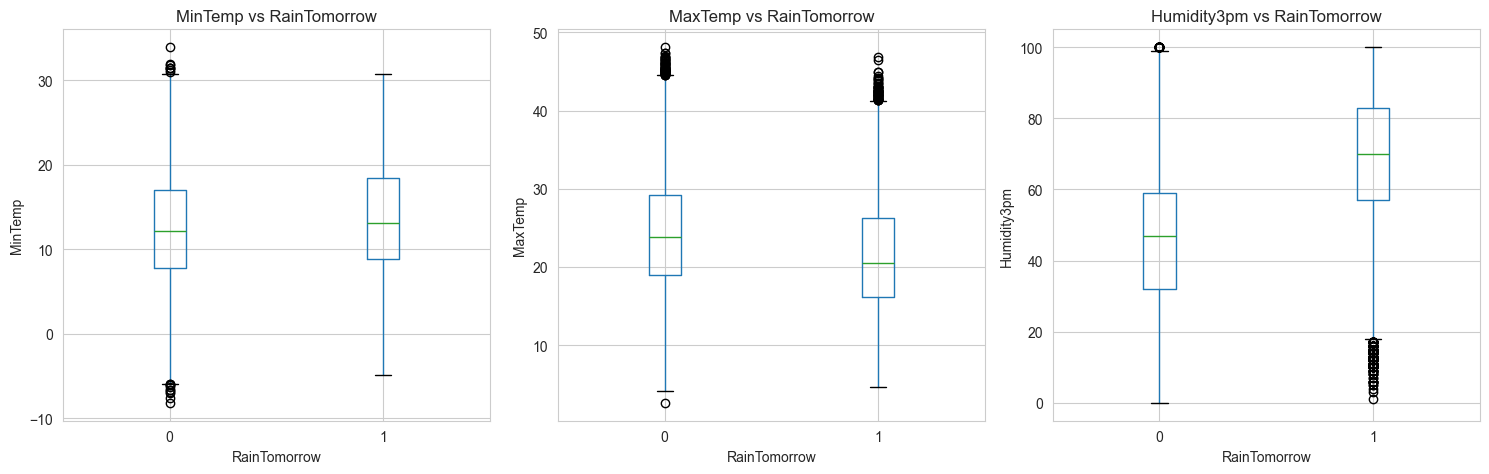

In [36]:
# Box plots for key features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MinTemp vs RainTomorrow
data_clean.boxplot(column='MinTemp', by='RainTomorrow', ax=axes[0])
axes[0].set_title('MinTemp vs RainTomorrow')
axes[0].set_xlabel('RainTomorrow')
axes[0].set_ylabel('MinTemp')

# MaxTemp vs RainTomorrow
data_clean.boxplot(column='MaxTemp', by='RainTomorrow', ax=axes[1])
axes[1].set_title('MaxTemp vs RainTomorrow')
axes[1].set_xlabel('RainTomorrow')
axes[1].set_ylabel('MaxTemp')

# Humidity3pm vs RainTomorrow
data_clean.boxplot(column='Humidity3pm', by='RainTomorrow', ax=axes[2])
axes[2].set_title('Humidity3pm vs RainTomorrow')
axes[2].set_xlabel('RainTomorrow')
axes[2].set_ylabel('Humidity3pm')

plt.suptitle('')
plt.tight_layout()
plt.show()

## Step 10: Feature Scaling

In [37]:
# Separate features and target
X = data_clean.drop('RainTomorrow', axis=1)
y = data_clean['RainTomorrow']

# Get feature names before scaling
feature_names = X.columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with feature names
X_scaled = pd.DataFrame(X_scaled, columns=feature_names)

print("Feature Scaling Complete!")
print("\nScaled features shape:", X_scaled.shape)
print("\nTarget variable shape:", y.shape)
print("\nFirst few scaled features:")
print(X_scaled.head())

Feature Scaling Complete!

Scaled features shape: (112925, 16)

Target variable shape: (112925,)

First few scaled features:
    MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0  0.117567 -0.108221 -0.206661     1.129726       0.241214    1.266352   
1 -0.841802  0.206845 -0.276405     1.343715       0.241214   -0.271981   
2  0.037620  0.292772 -0.276405     1.557705       0.391345    1.266352   
3 -0.553991  0.622159 -0.276405    -0.796182      -1.260094    0.387304   
4  0.773137  1.237969 -0.160165     1.129726       0.016018   -1.370790   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0    1.352000      0.577742      0.524408     0.190140    -1.380413   
1    1.568648     -1.339742      0.291310    -1.237561    -1.235963   
2    1.568648      0.457900      0.757507    -1.554828    -0.995214   
3   -1.681079     -0.500842     -1.223831    -1.184683    -1.669313   
4   -0.164540     -0.980214      0.058211     0.771796    -0.850764  

## Step 11: Split Data into Train and Test Sets

In [38]:
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Splitting Complete!")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())
print(f"\nTarget distribution in test set:")
print(y_test.value_counts())

Data Splitting Complete!

Training set shape: (90340, 16)
Test set shape: (22585, 16)

Target distribution in training set:
RainTomorrow
0    70510
1    19830
Name: count, dtype: int64

Target distribution in test set:
RainTomorrow
0    17628
1     4957
Name: count, dtype: int64


## Step 12: Model Building and Training

In [39]:
# Dictionary to store models and their accuracies
models_dict = {}
accuracies = {}

# 1. Logistic Regression
print("Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
models_dict['Logistic Regression'] = lr
accuracies['Logistic Regression'] = lr_accuracy
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}\n")

# 2. Decision Tree Classifier
print("Training Decision Tree Classifier...")
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
models_dict['Decision Tree'] = dt
accuracies['Decision Tree'] = dt_accuracy
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}\n")

# 3. Random Forest Classifier
print("Training Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
models_dict['Random Forest'] = rf
accuracies['Random Forest'] = rf_accuracy
print(f"Random Forest Accuracy: {rf_accuracy:.4f}\n")

# 4. Support Vector Machine
print("Training Support Vector Machine...")
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
models_dict['SVM'] = svm_model
accuracies['SVM'] = svm_accuracy
print(f"SVM Accuracy: {svm_accuracy:.4f}\n")

# 5. K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
models_dict['KNN'] = knn
accuracies['KNN'] = knn_accuracy
print(f"KNN Accuracy: {knn_accuracy:.4f}\n")

# 6. XGBoost
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
models_dict['XGBoost'] = xgb_model
accuracies['XGBoost'] = xgb_accuracy
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.8497

Training Decision Tree Classifier...
Decision Tree Accuracy: 0.8409

Training Random Forest Classifier...
Random Forest Accuracy: 0.8548

Training Support Vector Machine...
SVM Accuracy: 0.8546

Training K-Nearest Neighbors...
KNN Accuracy: 0.8379

Training XGBoost...
XGBoost Accuracy: 0.8562



## Step 13: Model Evaluation


MODEL ACCURACY COMPARISON
              Model  Accuracy
            XGBoost  0.856188
      Random Forest  0.854771
                SVM  0.854594
Logistic Regression  0.849723
      Decision Tree  0.840912
                KNN  0.837857


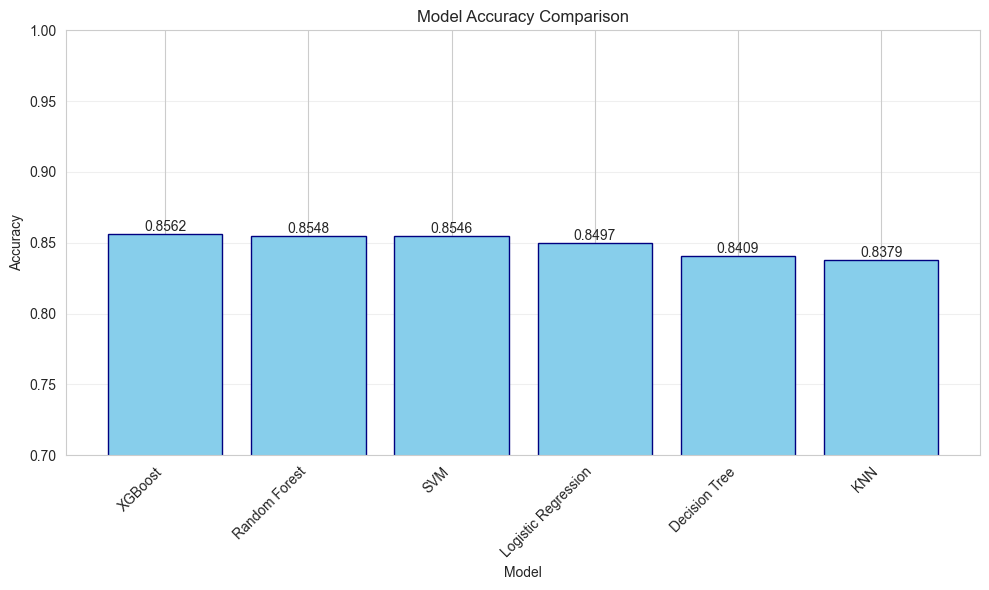


Best Model: XGBoost with Accuracy: 0.8562


In [40]:
# Compare model accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "="*50)
print("MODEL ACCURACY COMPARISON")
print("="*50)
print(accuracy_df.to_string(index=False))

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue', edgecolor='navy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Find best model
best_model_name = accuracy_df.iloc[0]['Model']
best_model = models_dict[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {accuracy_df.iloc[0]['Accuracy']:.4f}")


Confusion Matrix for XGBoost:
[[16660   968]
 [ 2280  2677]]


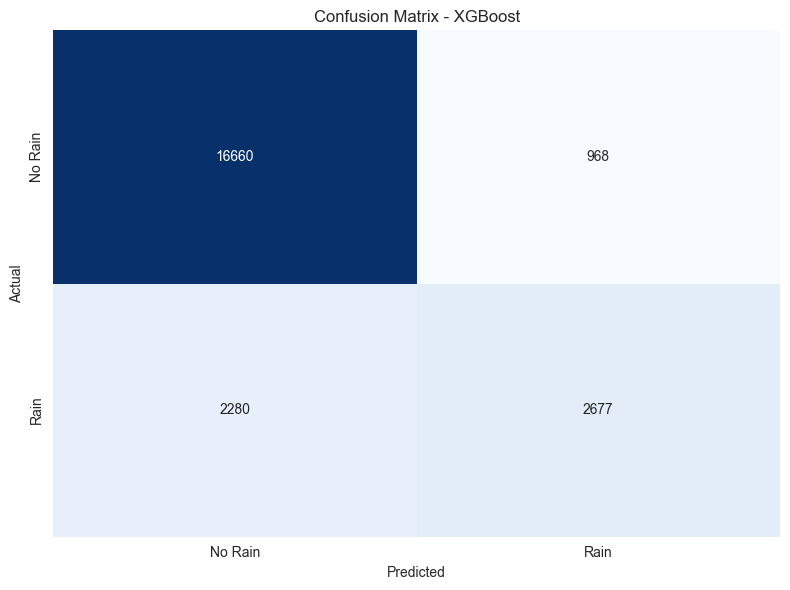


Metrics:
True Positives: 2677
True Negatives: 16660
False Positives: 968
False Negatives: 2280


In [41]:
# Confusion Matrix for the best model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

print(f"\nConfusion Matrix for {best_model_name}:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Calculate metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nMetrics:")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

In [42]:
# Classification Report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best, target_names=['No Rain', 'Rain']))


Classification Report for XGBoost:
              precision    recall  f1-score   support

     No Rain       0.88      0.95      0.91     17628
        Rain       0.73      0.54      0.62      4957

    accuracy                           0.86     22585
   macro avg       0.81      0.74      0.77     22585
weighted avg       0.85      0.86      0.85     22585



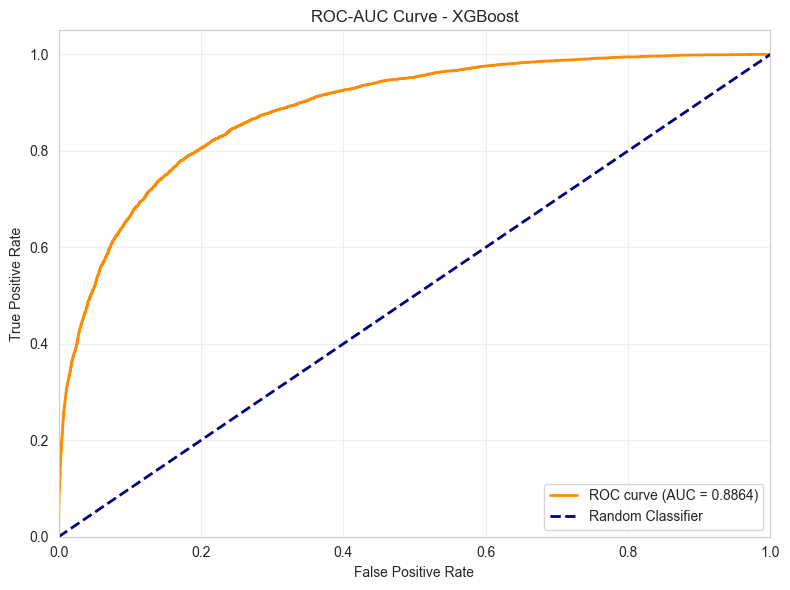


ROC-AUC Score: 0.8864


In [43]:
# ROC-AUC Curve for the best model
if hasattr(best_model, 'predict_proba'):
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = best_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC-AUC Score: {roc_auc:.4f}")

## Step 14: Save the Model and Preprocessing Objects

In [44]:
from pathlib import Path
# Save the best model
base_dir = Path.cwd().resolve()
deploy_dir = base_dir.parent / 'IBM_endpoint_deploy'
deploy_dir.mkdir(parents=True, exist_ok=True)

model_path = deploy_dir / 'rainfall.pkl'
pickle.dump(best_model, open(model_path, 'wb'))
print(f"Model saved at: {model_path}")

# Save the scaler
scaler_path = deploy_dir / 'scale.pkl'
pickle.dump(scaler, open(scaler_path, 'wb'))
print(f"Scaler saved at: {scaler_path}")

# Save the imputer
imputer_path = deploy_dir / 'impter.pkl'
pickle.dump(imputer, open(imputer_path, 'wb'))
print(f"Imputer saved at: {imputer_path}")

# Save the categorical imputer for wind directions
cat_imputer_path = deploy_dir / 'cat_impter.pkl'
pickle.dump(categorical_imputer, open(cat_imputer_path, 'wb'))
print(f"Categorical Imputer saved at: {cat_imputer_path}")

# Save label encoders
encoder_path = deploy_dir / 'encoder.pkl'
pickle.dump(label_encoders, open(encoder_path, 'wb'))
print(f"Label Encoders saved at: {encoder_path}")

# Save feature names
features_path = deploy_dir / 'feature_names.pkl'
pickle.dump(feature_names.tolist(), open(features_path, 'wb'))
print(f"Feature names saved at: {features_path}")

print("\n" + "="*50)
print("ALL MODELS AND PREPROCESSING OBJECTS SAVED!")
print("="*50)

Model saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/rainfall.pkl
Scaler saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/scale.pkl
Imputer saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/impter.pkl
Categorical Imputer saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/cat_impter.pkl
Label Encoders saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/encoder.pkl
Feature names saved at: /Users/akondiathreya/Documents/Development/Projects/APSCHE/IBM_endpoint_deploy/feature_names.pkl

ALL MODELS AND PREPROCESSING OBJECTS SAVED!


## Summary

In [45]:
print("\n" + "="*60)
print("RAINFALL PREDICTION MODEL - PROJECT SUMMARY")
print("="*60)

print(f"\n1. DATA COLLECTION & PREPROCESSING:")
print(f"   - Original dataset shape: {data.shape}")
print(f"   - Cleaned dataset shape: {data_clean.shape}")
print(f"   - Missing values handled with imputation")
print(f"   - Categorical variables encoded")

print(f"\n2. FEATURE ENGINEERING:")
print(f"   - Total features: {X.shape[1]}")
print(f"   - Features scaled using StandardScaler")
print(f"   - Train-Test split: 80-20")

print(f"\n3. MODEL BUILDING:")
print(f"   - Algorithms tested: {len(models_dict)}")
print(f"   - Best Model: {best_model_name}")
print(f"   - Best Accuracy: {accuracy_df.iloc[0]['Accuracy']:.4f}")
print(f"   - ROC-AUC Score: {roc_auc:.4f}")

print(f"\n4. MODEL DEPLOYMENT:")
print(f"   - Model saved: ✓")
print(f"   - Scaler saved: ✓")
print(f"   - Imputers saved: ✓")
print(f"   - Encoders saved: ✓")
print(f"   - Ready for Flask deployment: ✓")

print("\n" + "="*60)


RAINFALL PREDICTION MODEL - PROJECT SUMMARY

1. DATA COLLECTION & PREPROCESSING:
   - Original dataset shape: (145460, 24)
   - Cleaned dataset shape: (112925, 17)
   - Missing values handled with imputation
   - Categorical variables encoded

2. FEATURE ENGINEERING:
   - Total features: 16
   - Features scaled using StandardScaler
   - Train-Test split: 80-20

3. MODEL BUILDING:
   - Algorithms tested: 6
   - Best Model: XGBoost
   - Best Accuracy: 0.8562
   - ROC-AUC Score: 0.8864

4. MODEL DEPLOYMENT:
   - Model saved: ✓
   - Scaler saved: ✓
   - Imputers saved: ✓
   - Encoders saved: ✓
   - Ready for Flask deployment: ✓

